<img src="../Udacity_DL_Nanodegree/031%20RNN%20Super%20Basics/SimpleRNN01.png" align="left"/>

# Neural Network

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pdb

**Sigmoid**

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

**Hyperbolic Tangent**

In [12]:
def tanh(x):
    return np.tanh(x)

def tanh_der(x):
    return 1.0 - np.tanh(x)**2

**Mean Squared Error**

In [23]:
def mse(x, y, Wxh, Whh, Who):
    y_hat = forward(x, Wxh, Whh, Who)
    return 0.5 * np.mean((y-y_hat)**2)

**Forward Pass**

In [14]:
def forward(x, Wxh, Whh, Who):
    assert x.ndim==3 and x.shape[1:]==(4, 3)
    
    x_t0 = x[:,0,:]
    x_t1 = x[:,1,:]
    x_t2 = x[:,2,:]
    x_t3 = x[:,3,:]
        
    s_init = np.zeros([len(x), len(Whh)])   # [n_batch, n_hid]
    z_t0 = s_init @ Whh + x_t0 @ Wxh
    s_t0 = tanh(z_t0)
    z_t1 = s_t0 @ Whh + x_t1 @ Wxh
    s_t1 = tanh(z_t1)
    z_t2 = s_t1 @ Whh + x_t2 @ Wxh
    s_t2 = tanh(z_t2)
    z_t3 = s_t2 @ Whh + x_t3 @ Wxh
    s_t3 = tanh(z_t3)
    z_out = s_t3 @ Who
    y_hat = sigmoid( z_out )
    
    return y_hat

In [15]:
def forward(x, Wxh, Whh, Who):
    assert x.ndim==3 and x.shape[1:]==(4, 3)
    
    x_t = {}
    s_t = {}
    z_t = {}
    s_t[-1] = np.zeros([len(x), len(Whh)])   # [n_batch, n_hid]
    T = x.shape[1]
    
    for t in range(T):
        x_t[t] = x[:,t,:]
        z_t[t] = s_t[t-1] @ Whh + x_t[t] @ Wxh
        s_t[t] = tanh(z_t[t])
    
    z_out = s_t[t] @ Who
    y_hat = sigmoid( z_out )
    
    return y_hat

**Backpropagation**

In [16]:
def backward(x, y, Wxh, Whh, Who):
    assert x.ndim==3 and x.shape[1:]==(4, 3)
    assert y.ndim==2 and y.shape[1:]==(1,)
    assert len(x) == len(y)
    
    # Forward
    x_t0 = x[:,0,:]
    x_t1 = x[:,1,:]
    x_t2 = x[:,2,:]
    x_t3 = x[:,3,:]
        
    s_init = np.zeros([len(x), len(Whh)])   # [n_batch, n_hid]
    z_t0 = s_init @ Whh + x_t0 @ Wxh
    s_t0 = tanh(z_t0)
    z_t1 = s_t0 @ Whh + x_t1 @ Wxh
    s_t1 = tanh(z_t1)
    z_t2 = s_t1 @ Whh + x_t2 @ Wxh
    s_t2 = tanh(z_t2)
    z_t3 = s_t2 @ Whh + x_t3 @ Wxh
    s_t3 = tanh(z_t3)
    z_out = s_t3 @ Who
    y_hat = sigmoid( z_out )
    
    # Backward
    dWxh = np.zeros_like(Wxh)
    dWhh = np.zeros_like(Whh)
    dWho = np.zeros_like(Who)
    
    err = -(y-y_hat)/len(x) * sigmoid_der( z_out )
    dWho = s_t3.T @ err
    ro_t3 = err @ Who.T * tanh_der(z_t3)
    
    dWxh += x_t3.T @ ro_t3
    dWhh += s_t2.T @ ro_t3
    ro_t2 = ro_t3 @ Whh.T * tanh_der(z_t2)
    
    dWxh += x_t2.T @ ro_t2
    dWhh += s_t1.T @ ro_t2
    ro_t1 = ro_t2 @ Whh.T * tanh_der(z_t1)
    
    dWxh += x_t1.T @ ro_t1
    dWhh += s_t0.T @ ro_t1
    ro_t0 = ro_t1 @ Whh.T * tanh_der(z_t0)
    
    dWxh += x_t0.T @ ro_t0
    dWhh += s_init.T @ ro_t0
    
    return y_hat, dWxh, dWhh, dWho

In [17]:
def backward(x, y, Wxh, Whh, Who):
    assert x.ndim==3 and x.shape[1:]==(4, 3)
    assert y.ndim==2 and y.shape[1:]==(1,)
    assert len(x) == len(y)
    
    # Init
    x_t = {}
    s_t = {}
    z_t = {}
    s_t[-1] = np.zeros([len(x), len(Whh)])   # [n_batch, n_hid]
    T = x.shape[1]
        
    # Forward
    for t in range(T):                                  # t = [0, 1, 2, 3]
        x_t[t] = x[:,t,:]                               # pick time-step input          x_[t].shape = (n_batch, n_in)
        z_t[t] = s_t[t-1] @ Whh + x_t[t] @ Wxh
        s_t[t] = tanh(z_t[t])
    z_out = s_t[t] @ Who
    y_hat = sigmoid( z_out )
    
    # Backward
    dWxh = np.zeros_like(Wxh)
    dWhh = np.zeros_like(Whh)
    dWho = np.zeros_like(Who)
    
    ro = -(y-y_hat)/len(x) * sigmoid_der( z_out )       # Backprop through loss funt.
    dWho = s_t[t].T @ ro                                # 
    ro = ro @ Who.T * tanh_der(z_t[t])                  # Backprop into hidden state
    
    for t in reversed(range(T)):                        # t = [3, 2, 1, 0]
        dWxh += x_t[t].T @ ro
        dWhh += s_t[t-1].T @ ro
        if t != 0:                                      # don't backprop into t=-1
            ro = ro @ Whh.T * tanh_der(z_t[t-1])        # Backprop into previous time step
    
    return y_hat, dWxh, dWhh, dWho

**Train Loop**

In [19]:
def train_rnn(x, y, nb_epochs, learning_rate, Wxh, Whh, Who):
    
    losses = []
    
    for e in range(nb_epochs):
        
        y_hat, dWxh, dWhh, dWho = backward(x, y, Wxh, Whh, Who)
        
        Wxh += -learning_rate * dWxh
        Whh += -learning_rate * dWhh
        Who += -learning_rate * dWho
        
        # Log and print
        loss_train = mse(x, y, Wxh, Whh, Who)
        losses.append(loss_train)
        if e % (nb_epochs / 10) == 0:
            print('loss ', loss_train.round(4))
        
    return losses

# Example: Count Letter 'a'

**Create Dataset**

In [32]:
# Encoding: 'a'=[0,0,1] 'b'=[0,1,0] 'c'=[1,0,0]

#                            < ----- 4x time steps ----- >
x_train = np.array([    
                    [ [0, 1, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0] ],  #  'bbcb'
                    [ [1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 1, 0] ],  #  'cbcb'   ^
                    [ [0, 1, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0] ],  #  'bcbc'   ^
                    [ [1, 0, 0], [0, 1, 0], [0, 1, 0], [1, 0, 0] ],  #  'cbbc'   ^
                    [ [1, 0, 0], [1, 0, 0], [0, 1, 0], [1, 0, 0] ],  #  'ccbc'   ^
    
    
                    [ [0, 1, 0], [0, 0, 1], [1, 0, 0], [0, 1, 0] ],  #  'bacb'   | 9x batch size
                    [ [1, 0, 0], [1, 0, 0], [0, 1, 0], [0, 0, 1] ],  #  'ccba'   v
                    [ [0, 0, 1], [1, 0, 0], [0, 1, 0], [1, 0, 0] ],  #  'acbc'   ^
                    [ [1, 0, 0], [0, 1, 0], [0, 0, 1], [1, 0, 0] ],  #  'cbac'   ^
                    
                    [ [0, 1, 0], [0, 0, 1], [0, 0, 1], [0, 1, 0] ],  #  'baab'
                    [ [0, 0, 1], [0, 0, 1], [0, 1, 0], [1, 0, 0] ],  #  'aabc'
    
                    [ [0, 0, 1], [1, 0, 0], [0, 0, 1], [0, 0, 1] ],  #  'acaa'
                   ])
y_train = np.array([ [0],   # <->  no timesteps
                     [0],   #
                     [0],   #
                     [0],   #
                     [0],   #
                    
                     [1],   #  ^
                     [1],   #  |  9x batch size
                     [1],   #  ^
                     [1],   #  |  9x batch size
                    
                     [0],   #  v
                     [0],   #
                    
                     [1] ]) #
x_test = np.array([
                   [ [0,1,0], [1,0,0], [1,0,0], [0,1,0] ],  #  'bccb' -> 0
                   [ [1,0,0], [1,0,0], [0,1,0], [1,0,0] ],  #  'ccbb' -> 0
                   [ [0,1,0], [1,0,0], [0,0,1], [1,0,0] ],  #  'bcac' -> 1
                   [ [0,1,0], [0,0,1], [1,0,0], [0,1,0] ],  #  'bacb' -> 1
                  ])
y_test = np.array([ [0],   # <->  no timesteps
                    [0],   #
                    [1],   #
                    [1], ])

In [93]:
test_gradient()

#### Train

In [21]:
np.random.seed(0)
W_xh = 0.1 * np.random.randn(3, 2)  # Wxh.shape: [n_in, n_hid]
W_hh = 0.1 * np.random.randn(2, 2)  # Whh.shape: [n_hid, n_hid]
W_ho = 0.1 * np.random.randn(2, 1)  # Who.shape: [n_hid, n_out]

In [24]:
losses = train_rnn(x_train, y_train, 3000, 0.1, W_xh, W_hh, W_ho)

loss  0.1261
loss  0.1247
loss  0.1212
loss  0.1057
loss  0.0891
loss  0.0766
loss  0.0651
loss  0.0468
loss  0.0216
loss  0.0092


In [27]:
y_hat = forward(x_train, W_xh, W_hh, W_ho).round(0)
y_hat

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]])

In [28]:
y_hat == y_train

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [35]:
y_hat = forward(x_test, W_xh, W_hh, W_ho).round(0)
y_hat

array([[0.],
       [0.],
       [1.],
       [1.]])

In [37]:
y_hat == y_test

array([[ True],
       [ True],
       [ True],
       [ True]])

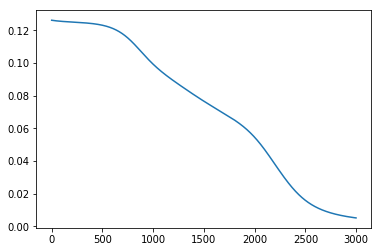

In [38]:
plt.plot(losses)

# Gradient Check

In [44]:
def numerical_gradient(x, y, Wxh, Whh, Who):
    dWxh = np.zeros_like(Wxh)
    dWhh = np.zeros_like(Whh)
    dWho = np.zeros_like(Who)
    eps = 1e-4
    
    for r in range(len(Wxh)):
        for c in range(Wxh.shape[1]):
            Wxh_pls = Wxh.copy()
            Wxh_min = Wxh.copy()
            
            Wxh_pls[r, c] += eps
            Wxh_min[r, c] -= eps
            
            l_pls = mse(x, y, Wxh_pls, Whh, Who)
            l_min = mse(x, y, Wxh_min, Whh, Who)
            
            dWxh[r, c] = (l_pls - l_min) / (2*eps)
    
    for r in range(len(Whh)):
        for c in range(Whh.shape[1]):
            Whh_pls = Whh.copy()
            Whh_min = Whh.copy()
            
            Whh_pls[r, c] += eps
            Whh_min[r, c] -= eps
            
            l_pls = mse(x, y, Wxh, Whh_pls, Who)
            l_min = mse(x, y, Wxh, Whh_min, Who)
            
            dWhh[r, c] = (l_pls - l_min) / (2*eps)
    
    for r in range(len(Who)):
        for c in range(Who.shape[1]):
            Who_pls = Who.copy()
            Who_min = Who.copy()
            
            Who_pls[r, c] += eps
            Who_min[r, c] -= eps
            
            l_pls = mse(x, y, Wxh, Whh, Who_pls)
            l_min = mse(x, y, Wxh, Whh, Who_min)
            
            dWho[r, c] = (l_pls - l_min) / (2*eps)
    
    
    return dWxh, dWhh, dWho

In [51]:
def test_gradients():
    for i in range(100):
        W_xh = 0.1 * np.random.randn(3, 2)  # Wxh.shape: [n_in, n_hid]
        W_hh = 0.1 * np.random.randn(2, 2)  # Whh.shape: [n_hid, n_hid]
        W_ho = 0.1 * np.random.randn(2, 1)  # Who.shape: [n_hid, n_out]

        xx = np.random.randn(100, 4, 3)
        yy = np.random.randint(0, 2, size=[100, 1])

        _, dW_xh, dW_hh, dW_ho = backward(xx, yy, W_xh, W_hh, W_ho)
        ngW_xh, ngW_hh, ngW_ho = numerical_gradient(xx, yy, W_xh, W_hh, W_ho)

        assert np.allclose(dW_xh, ngW_xh)
        assert np.allclose(dW_hh, ngW_hh)
        assert np.allclose(dW_ho, ngW_ho)

In [52]:
test_gradients()